In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import activations
from keras.optimizers import SGD
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as pyplot
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import shutil
import random


In [3]:
  #Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Location of Zip File
drive_path = '/content/gdrive/MyDrive/Multiclass_dataset.zip'
local_path = '/content'
!cp '{drive_path}' .
os.chdir(local_path)
!unzip -q 'Multiclass_dataset.zip'

In [5]:
# Path to the dataset (replace this with your dataset's path)
dataset_path = '/content/Multiclass_dataset'  # Change this to your dataset folder

# Directory where you want to create train/test splits
output_dir = '/content/retinal_detachment_split'

# Percentage of data to be used for testing
test_split = 0.2


In [6]:
# Create train and test directories
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


In [7]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths
original_dataset_dir = '/content/Multiclass_dataset'
train_dir = '/content/retinal_detachment_split/train'
test_dir = '/content/retinal_detachment_split/test'

# Create train and test directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# List all classes
classes = os.listdir(original_dataset_dir)

# Split data for each class
for class_name in classes:
    class_dir = os.path.join(original_dataset_dir, class_name)
    images = os.listdir(class_dir)

    # Split into train and test sets (e.g., 80% train, 20% test)
    train_images, test_images = train_test_split(images, test_size=0.15, random_state=42)

    # Create class directories in train and test folders
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    # Move train images
    for img in train_images:
        shutil.move(os.path.join(class_dir, img), os.path.join(train_dir, class_name, img))

    # Move test images
    for img in test_images:
        shutil.move(os.path.join(class_dir, img), os.path.join(test_dir, class_name, img))


Found 1597 images belonging to 4 classes.
Found 284 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,246,596 (84.86 MB)

 Trainable params: 22,246,148 (84.86 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.5778 - loss: 2.1060 - val_accuracy: 0.1197 - val_loss: 3.1356
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.6606 - loss: 0.9361 - val_accuracy: 0.1479 - val_loss: 3.5042
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.7594 - loss: 0.6409 - val_accuracy: 0.4683 - val_loss: 1.8908
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.7251 - loss: 0.7184 - val_accuracy: 0.3345 - val_loss: 2.3108
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.7634 - loss: 0.5755 - val_accuracy: 0.5739 - val_loss: 1.8518
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.7473 - loss: 0.6282 - val_accuracy: 0.6479 - val_loss: 1.3754
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.7738 - loss: 0.5662 - val_accuracy: 0.6620 - val_loss: 1.6252
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7740 - loss: 0.5811 - val_accuracy: 0.7113 - val_loss: 0.9

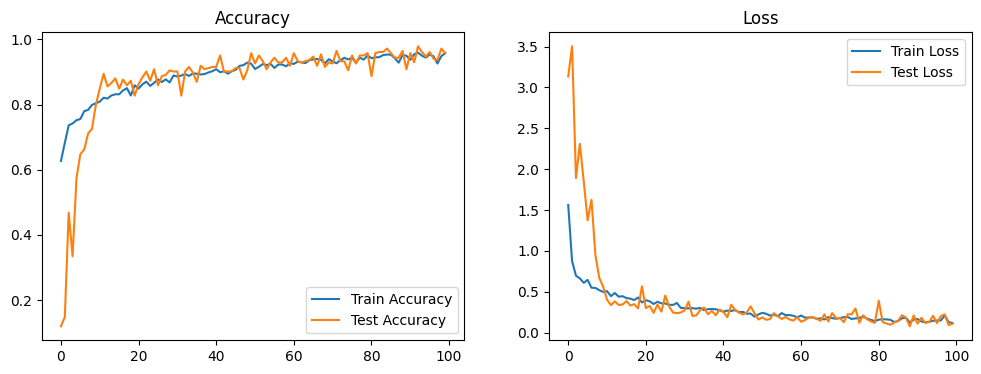

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

# Image dimensions
img_height, img_width = 224, 224  # You can modify the resolution as needed
batch_size = 32
num_classes = 4  # Four disease classes

# Enhanced Data Augmentation setup
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,  # Removed vertical flip as it's often not realistic for medical images
    brightness_range=[0.9, 1.1],  # Slightly reduced brightness variation
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Data loaders
train_generator = train_datagen.flow_from_directory(
    '/content/retinal_detachment_split/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_directory(
    '/content/retinal_detachment_split/test',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'
)

# Simplified CNN Model
model = models.Sequential()

# Adding fewer convolutional layers with reduced filter sizes
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))  # Reduced number of dense layer neurons
model.add(layers.Dropout(0.4))  # Dropout reduced slightly to keep more data
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
optimizer = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

# Training the model
n_epochs = 100
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=n_epochs,
    batch_size=batch_size,
    verbose=1
)

# Evaluate model performance
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Plot accuracy and loss graphs
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('Loss')
    plt.legend()

    plt.show()

# Plot training history
plot_history(history)


In [9]:
def evaluate_model(model, train_generator, test_generator):
    """Evaluates the model using the provided data generators.

    Args:
        model: The trained Keras model.
        train_generator: The data generator for the training data.
        test_generator: The data generator for the testing data.
    """
    train_loss, train_acc = model.evaluate(train_generator, verbose=1)
    test_loss, test_acc = model.evaluate(test_generator, verbose=1)
    print("Train Loss = %.3f Train Acc = %.3f Test Loss=%.3f Test Acc = %.3f " % (train_loss, train_acc, test_loss, test_acc))

# ... (previous code) ...

# Evaluate model performance (replace the original call)
evaluate_model(model, train_generator, test_generator)

50/50 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.9663 - loss: 0.0968
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9588 - loss: 0.1270
Train Loss = 0.098 Train Acc = 0.966 Test Loss=0.109 Test Acc = 0.958 


Model input shape: (None, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


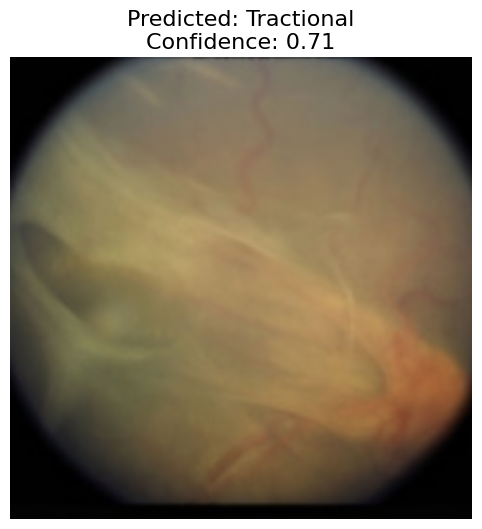

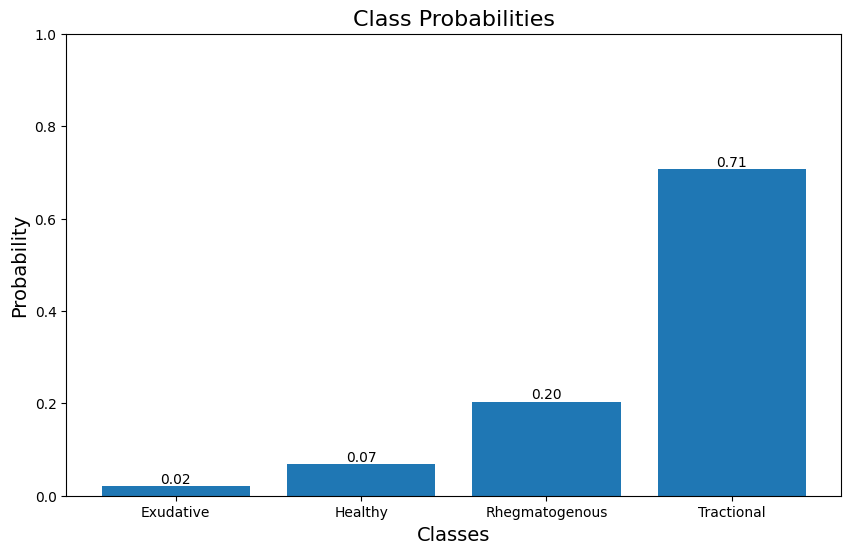

The image is classified as: Tractional
Confidence: 0.71


In [35]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

def predict_image(model, image_path, target_size=(256, 256)):
    # Load and preprocess the image
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Unable to load image from {image_path}")

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, target_size)
    img = img.astype('float32') / 255.0  # Normalize to [0,1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Get the input shape that the model expects
    input_shape = model.input_shape[1:]  # Exclude batch dimension
    if input_shape != img.shape[1:]:
        img = tf.image.resize(img, input_shape[:2])

    # Make prediction
    prediction = model.predict(img)

    # Interpret the prediction
    class_names = ["Exudative", "Healthy", "Rhegmatogenous", "Tractional"]
    predicted_class_index = np.argmax(prediction[0])
    predicted_class = class_names[predicted_class_index]
    confidence = prediction[0][predicted_class_index]

    # Display the image and prediction
    plt.figure(figsize=(10, 6))
    plt.imshow(img[0])
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}", fontsize=16)
    plt.show()

    # Display the probabilities for all classes
    plt.figure(figsize=(10, 6))
    plt.bar(class_names, prediction[0])
    plt.title("Class Probabilities", fontsize=16)
    plt.xlabel("Classes", fontsize=14)
    plt.ylabel("Probability", fontsize=14)
    plt.ylim(0, 1)
    for i, v in enumerate(prediction[0]):
        plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')
    plt.show()

    return predicted_class, confidence

# Now, let's call the function with a new image path
new_image_path = '/content/retinal_detachment_split/test/Tractional/image-square (124).jpg'  # Replace this with your actual image path

# Print model input shape
print(f"Model input shape: {model.input_shape}")

# Assuming 'model' is your trained model
predicted_class, confidence = predict_image(model, new_image_path)

print(f"The image is classified as: {predicted_class}")
print(f"Confidence: {confidence:.2f}")

In [13]:
# Assuming you have a trained model named `model`
model.save('model.h5')  # Save as HDF5 file


import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model('model.h5')

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model
with open('Model.tflite', 'wb') as f:
    f.write(tflite_model)


converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save the optimized model
with open('optimized_Model.tflite', 'wb') as f:
    f.write(tflite_model)


#: Download the TFLite Model
from google.colab import files

files.download('optimized_Model.tflite')


Saved artifact at '/tmp/tmpf6s12j1d'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  139608253917216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139608253920912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139608253964784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139608253965664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139608253960208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139608253962496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139608254055872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139608254058864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139608216076352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139608216091840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139608253970240

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>